# SS154 Assignment 3: Spring 2023
### Author: Muhammad Abdullah Khan

In [1]:
# install.packages("janitor")
# install.packages("stargazer")
# install.packages("modelsummary")
# install.packages("knitr")
# install.packages("dagitty")
# install.packages("IRdisplay")
# install.packages("margins")
# install.packages("AER")
# install.packages("MASS")

In [23]:
# If you are using other packages, load them here. 
# If you don't have the following packages installed,
# please install them first. But don't include the installation
# code here because every time you knit this document they'll 
# be reinstalled which is not necessary!
library(MASS)
library(knitr)
library(janitor)
library(tidyverse)
library(stargazer)
library(modelsummary)
library(dagitty)
library(IRdisplay)
library(margins)
library(AER)

In [3]:
# Don't change the line below
knitr::opts_chunk$set(echo = TRUE, warning=FALSE, message=FALSE, fig.width=6, fig.align="center")

In [4]:
# we need to set the seed of R's random number generator, 
# in order to produce comparable results 
set.seed(1983)

### Question 1: A DGP-based example

In [5]:
D = sample(c(0,1), 500, replace = TRUE, prob = c(.7,.3))
Y = 0.5*D + rnorm(500, mean = 2)
X1 = 3.1*D - 2.4*Y
df = data.frame(D, Y, X1)
head(df)

,D,Y,X1
,<dbl>,<dbl>,<dbl>
1,0,1.553940,-3.729457
2,0,1.993194,-4.783665
3,0,3.983957,-9.561497
4,1,2.103998,-1.949595
5,1,4.102098,-6.745035
6,0,2.628093,-6.307423


**1.1. Which model is giving a less biased treatment effect and why?**

Looking at the data-generating process above, we see that the variable D is a binary variable with values of either 0 or 1. The draw is based on probability with 0 having a probability of 0.7 and 1, 0.3. 500 such samples are generated. D is the treatment variable in the model and a treatment indicator.  
Y is the outcome variable and is generated based on the following equation: $Y = 0.5*D + N(µ = 2)$. This means that theoretically the treatment effect is 0.5 and then we add a random noise to it which is based on random samples from the normal distribution with a mean of 2.  
X1 is generated using both values of D and Y is thus, a common effect of the two other variables. The equation used is: $X1 = 3.1*D + 2.4*Y$. No random noise is added to this part of the equation.

In [6]:
model1 = lm(Y ~ D, data = df)
summary(model1)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.9936405,0.05379355,37.060959,2.844216e-145
D,0.5322162,0.09989211,5.327911,1.507679e-07


In [7]:
model2 = lm(Y ~ D + X1, data = df)
summary(model2)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-3.415967e-15,3.274668e-16,-1.043149e+01,3.592268e-23
D,1.291667e+00,3.313839e-16,3.897796e+15,0.000000e+00
X1,-4.166667e-01,5.863126e-17,-7.106562e+15,0.000000e+00


To answer this question, other than the information above, we can also use a Directed Acyclic Graph (DAG) which allows visualization of the paths between the variables. DAGs allow us to identify backdoor paths, direct paths, and collider paths allowing us to realize which variables we need to control for. DAGs have limitations when there are unknown confounders as they can give a false sense of confidence about information that we don't actually have making us beleive that we are controlling for all covariates but gaps in knowledge such as unknown confounders or wrong pathway assumptions can lead to biased results. However, in this case, perfect knowledge of the DGP allows us to use DAGs to identify the correct variables to control for.

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



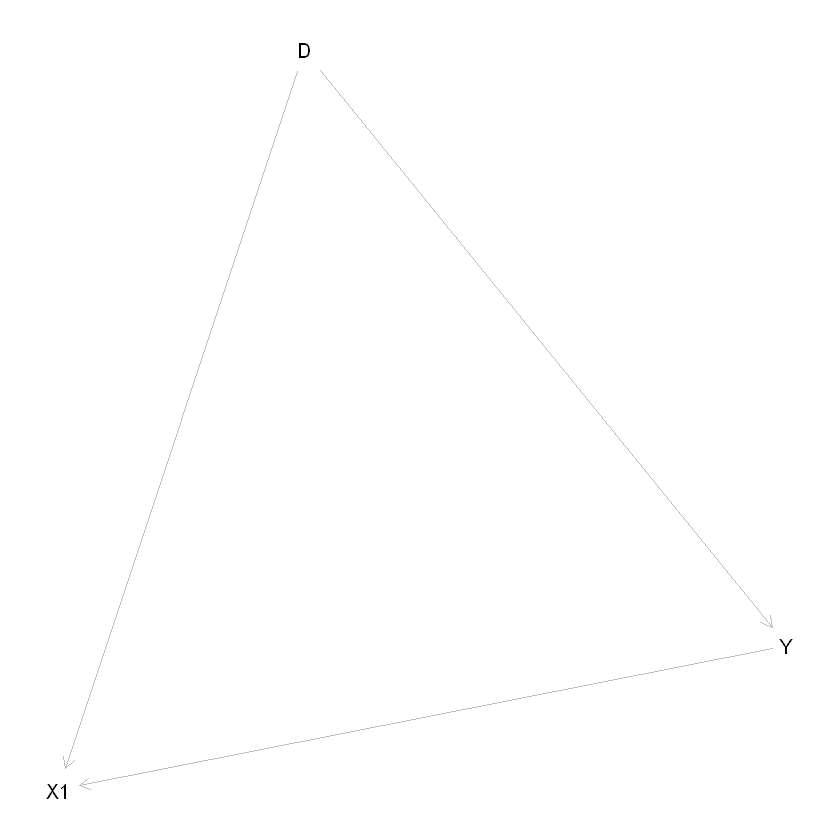

In [8]:
# make a dag
dag = dagitty("dag {
    D -> Y
    Y -> X1
    D -> X1
}")
# set coordinates
coordinates(dag) = list(Y = c(1,0), D = c(0,0), X1 = c(1,1))
# plot the dag
plot(dag)

Looking at the DAG above, we can see that X1 is a collider i.e. it is affected by both D & Y. Therefore, it is a common effect of those variables. If we include a collider in a regression, we can induce bias by conditioning on the common effect of the collider which in turn creates a spurious association between the variables that are not causally related.  
Controlling for a collider leads to incorrect inference and invalid conclusions abot the causal effects. This bias comes from the artificial association that we created between these variables that can distort the model. Based on this, model 1 is giving a less biased treatment effect.  
Running both the regressions above, we see that the treatment effect is 0.5895 in model 1 with a standard error of 0.1003 while in model 2, the treatment effect is 1.2917 with negligibe standard error. This shows that model 1 is giving a less biased treatment effect because we know from the data-generating process that $Y = 0.5*D + noise$  
Based on the discussion above, we can conclude that model 1 is giving a less biased treatment effect.

### QUESTION 2: Interpreting regression results

**2.1:** The number is the coefficient for the effect of having a same-race teacher on academic achievement. It represents the average difference in academic achievement between students who have a same-race teacher and those who do not, all other things being equal.  
Specifically, since we have normalized test scores that are being compared, the effect represents a change in standard deviations in academic achievement. This means that that on average, students with same-race teachers perform 0.084 standard deviations better in academic achievement than those who do not. It is statistically significant as well since the standard errors are much smaller than the coefficient i.e. the estimate of coefficient is much more precise and has less random error.
The effect size is quite small and despite being statistically significant, is might not be practically significant depending on the test scores.
*Example:* Imagine a standardized test where the average score is 100 and the standard deviation is 15. The difference of 0.084 standard deviations translates to a difference of 1.26 points (0.084 * 15) on average between studetns with the same-race teacher and those who do not. This is a very small difference and might not be practically significant.

**2.2:** The interaction term here investigates whether the effect of having the same-race teacher on academic acheivement varies depending on class size. Including it in the regression allows it to estimate separate treatment effects for different values of class size.  
This can be important for several reasons e.g. the effect of having the same-race teacher might potentially be stronger in larger classes where teachers have less time to spend with each student. Alternatively, it could be the opposite as well since large class sizes could mean a reduction in student-teacher interaction due to lower opportunities. This provides a more nuanced understanding of the relationship between teacher-student racial differences and academic achievement.  
In the paper, the p-value column is included that tests the null hypothesis that tests whether the interaction term and the coefficient of the treatment sum to zero. Based on the text, there is no statistically detectable difference between various class sizes.

**2.3:** The numbers in the parenthesis are the robust standard errors of the coefficients. They represent the precision of the estimates of the coefficients. The smaller the standard error, the more precise the estimate of the coefficient. Robust standard errors are used to adjust for potential violations of the assumptions of the regression model. Specifically, they handle issues realted to heteroscedasticity, autocorrelation, and non-normality.  
Heteroscedasticity is when the variance of the error term is not constant. This can be caused by outliers or other factors. Autocorrelation is when the error terms are correlated with each other. This can be caused by time-series data or other factors. Non-normality is when the error terms are not normally distributed. This can be caused by outliers or other factors. Robust standard errors adjust for this by using a more robust estimator of the variance.  
The p-value column tests the null hypothesis that the sum of the coefficient and the interaction term is zero. This is the null hypothesis that the treatment effect is the same for all values of class size.  
The robust standard errors are associated with the coefficients of the various variables while the p-value column is the p-value for the joint hypothesis that the coefficient and the interaction term sum to zero. It is related to the F-statistic. It informs us about the statistical significance of the overall model that contains the interaction term.

**2.4:** The null hypothesis is that the sum of the interaction term and the coefficient of the treatment is zero. This is the null hypothesis that the treatment effect is the same for all values of class size. The alternative hyothesis is that the sum is not zero i.e. the treatment effect is not the same for all values of class size.  
Since the value of 0.001 is smaller than the conventional significance level of 0.05, we can reject the null hypothesis that the treatment effect is the same for all values of class size.

### QUESTION 3: Regressions with binary outcomes

In [9]:
# reading the data from the link
df = read_csv("https://raw.githubusercontent.com/ahdvnd/ss154-data/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")

Rows: 1470 Columns: 35
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (9): Attrition, BusinessTravel, Department, EducationField, Gender, Job...
dbl (26): Age, DailyRate, DistanceFromHome, Education, EmployeeCount, Employ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
# Define a variable called satisfied that equals 0 if the employee job satisfaction is 1 or 2 and is 1 if the employee job satisfaction is 3 or 4.
df <- df %>% 
    mutate(satisfied = ifelse(JobSatisfaction %in% c(1,2), 0, 1))
# Define a variable called leave that equals 1 if the employee has left the company and 0 if the employee is still working.
# This is important in order to run regression later on.
df <- df %>%
    mutate(leave = ifelse(Attrition == "Yes", 1, 0))
head(df)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,satisfied,leave
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1,1
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,0
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,1,1
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,0,0
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,0,8,2,2,7,7,3,6,1,0


**3.1:**

In [11]:
# calculate percentage of employees who leave the company for each level of satisfaction
df %>% 
  group_by(satisfied) %>% 
  summarise(percentage = mean(Attrition == "Yes") * 100)

satisfied,percentage
<dbl>,<dbl>
0,19.68366
1,13.87347


From the table above, we can interpret that 19.68% of unsatisfied employees left the company and 13.87% of satisfied employees left the company. This means that the difference in the proportion of employees who left the company is 5.81%.

**3.2:**

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



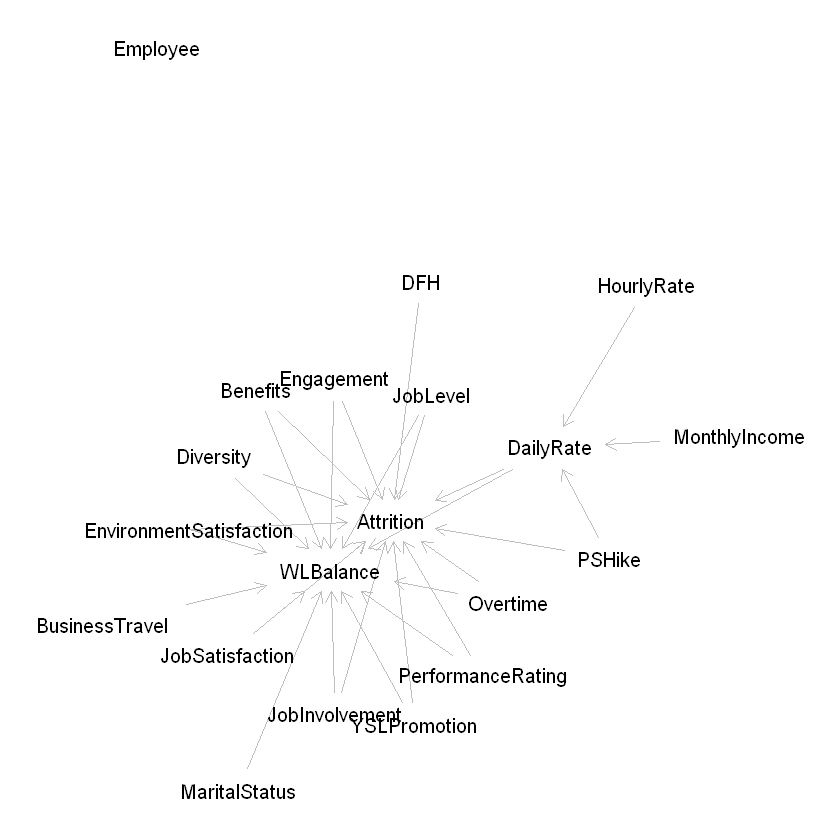

In [12]:
# make a dag
dag = dagitty("dag {
    WLBalance -> Attrition
    JobSatisfaction -> Attrition
    JobInvolvement -> Attrition
    JobLevel -> Attrition
    EnvironmentSatisfaction -> Attrition
    YSLPromotion -> Attrition
    DFH -> Attrition
    Overtime -> Attrition
    PSHike -> Attrition
    PerformanceRating -> Attrition
    DailyRate -> Attrition
    JobInvolvement -> WLBalance
    JobLevel -> WLBalance
    EnvironmentSatisfaction -> WLBalance
    YSLPromotion -> WLBalance
    JobSatisfaction -> WLBalance
    Overtime -> WLBalance
    PerformanceRating -> WLBalance
    DailyRate -> WLBalance
    BusinessTravel -> WLBalance
    MaritalStatus -> WLBalance
    HourlyRate -> DailyRate
    MonthlyIncome -> DailyRate
    PSHike -> DailyRate
    Employee Engagement -> WLBalance
    Employee Engagement -> Attrition
    Benefits -> Attrition
    Benefits -> WLBalance
    Diversity -> Attrition
    Diversity -> WLBalance
}")
# plot the dag
plot(dag)

While the code of the DAG above can be found, it is hard to read and understand the display. A better option might be importing a PNG from Daggity itself.

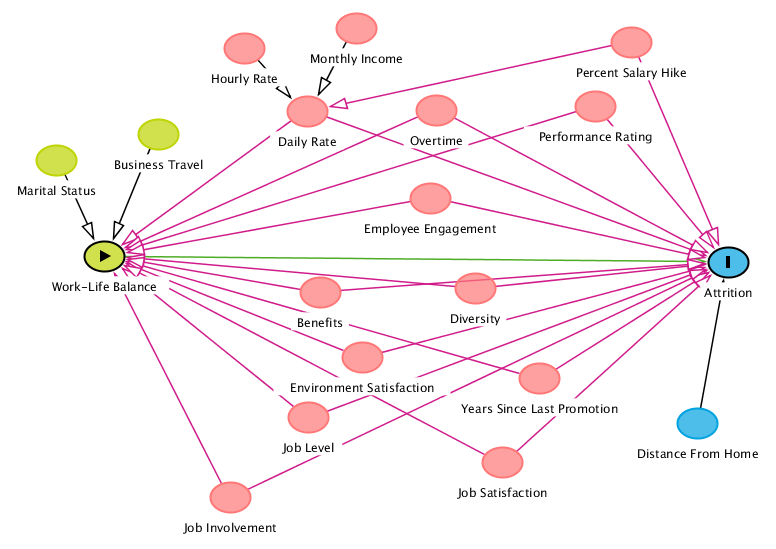

In [13]:
image_file <- "daggity-model.png"
image <- readBin(image_file, "raw", file.size(image_file))
display_png(image)

**Confounding variables:** Daily Rate, Environment Satisfaction, Job Involvement, Job Level, Job Satisfaction, Overtime, Performance Rating, Years Since Last Promotion.  
**Backdoor paths:**  
- Work-Life balance $\leftarrow$ Daily Rate $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Environment Satisfaction $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Job Involvement $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Job Level $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Job Satisfaction $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Overtime $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Performance Rating $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Years Since Last Promotion $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Daily Rate $\leftarrow$ Percent Salary Hike $\rightarrow$ Attrition

We don't need to control for Percent Salary Hike because controlling for Daily Rate already blocks that backdoor path.

**3.3:**

There are three variables that need to be controlled for that are added to the DAG. These are Diversity, Employee Engagement, & Benefits. All three of these are common causes of Attrition and Work-Life Balance. Diversity is a variable that contains information about the diversity at the company and can be a big factor in employee attrition. Employee Engagement is a variable that contains information about the engagement of the employees with each other. These relationships can be key to both Work-life balance and Attrition. Benefits contains information about the benefits that the company provides to its employees. This can be a big factor in employee attrition and work-life balance as more benefits usually lead to better work-life balance and less attrition.  
The backdoor paths are as follows:
- Work-Life balance $\leftarrow$ Diversity $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Employee Engagement $\rightarrow$ Attrition
- Work-Life balance $\leftarrow$ Benefits $\rightarrow$ Attrition

**3.4:**

In [14]:
# omitting missing values
df <- na.omit(df)

In [15]:
linear_probability_model <- lm(leave ~ as.factor(WorkLifeBalance) + satisfied + DailyRate + EnvironmentSatisfaction + JobInvolvement + JobLevel + JobSatisfaction + OverTime + PerformanceRating + YearsSinceLastPromotion, data = df)
summary(linear_probability_model)


Call:
lm(formula = leave ~ as.factor(WorkLifeBalance) + satisfied + 
    DailyRate + EnvironmentSatisfaction + JobInvolvement + JobLevel + 
    JobSatisfaction + OverTime + PerformanceRating + YearsSinceLastPromotion, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57211 -0.19829 -0.09852  0.01516  1.08285 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  8.440e-01  1.039e-01   8.123 9.63e-16 ***
as.factor(WorkLifeBalance)2 -1.327e-01  4.239e-02  -3.130  0.00178 ** 
as.factor(WorkLifeBalance)3 -1.591e-01  3.984e-02  -3.994 6.82e-05 ***
as.factor(WorkLifeBalance)4 -1.123e-01  4.712e-02  -2.384  0.01727 *  
satisfied                    5.434e-02  4.037e-02   1.346  0.17852    
DailyRate                   -4.351e-05  2.214e-05  -1.965  0.04961 *  
EnvironmentSatisfaction     -4.027e-02  8.175e-03  -4.926 9.34e-07 ***
JobInvolvement              -6.867e-02  1.253e-02  -5.482 4.96e-08 ***
JobLeve

**3.5:**  
I have used Work-life balance as a categorical variable in the linear probability model. The reason for this is that it has 4 possible values which allows the model to to see if there are differences in the effect of the treatment across various levels of the treatment. This makes sense because we could see extreme cases of work-life balance where the employee is working 24/7 and has no time for anything else. This could be a very different case from an employee who works 8 hours a day and has a good work-life balance. They would in turn have different effects of work-life balance on their attrition. Compared to these extremes the cases in the middle could be more similar to each other and show lesser effects of work-life balance on attrition. Thus, it can caputre the effect of work-life balance on attrition when the effect is non-linear.  
Using categorical variables also means that non-linear relationships between the treatment and the outcome can be captured. This is because the model can estimate separate treatment effects for different values of the treatment.

**3.6:**  
Let's assume that the numbers for Work-life balance represent the following:  
- 1: Bad
- 2: Average
- 3: Good
- 4: Excellent

The results from the regression use Level 1 as the reference category. This means that the results for the other levels are relative to the reference category. Thus, the results for Level 2 are the difference in the probability of attrition between Level 2 and Level 1. Similarly, the results for Level 3 are the difference in the probability of attrition between Level 3 and Level 1. The results for Level 4 are the difference in the probability of attrition between Level 4 and Level 1.  
Using this information, we can interpret the results as follows:  
For people with an Average work-life balance (Level 2), the probability of attrition is 0.1327 lower than for people with a bad work-life balance (Level 1). This means that the probability of them leaving the company is 13.27 percentage points lower than for people with a bad work-life balance holding all other variables constant.  
For people with an Good work-life balance (Level 3), the probability of attrition is 0.1591 lower than for people with a bad work-life balance (Level 1). This means that the probability of them leaving the company is 15.91 percentage points lower than for people with a bad work-life balance holding all other variables constant.  
For people with an Excellent work-life balance (Level 4), the probability of attrition is 0.1123 lower than for people with a bad work-life balance (Level 1). This means that the probability of them leaving the company is 11.23 percentage points lower than for people with a bad work-life balance holding all other variables constant.

**3.7:**  
The summary table above also includes the p-values which test the null hypothesis that the coefficient is zero. This is the null hypothesis that the treatment effect is zero. Thus, by looking at these values, we can see whether the coefficient estimated is by chance or can be trusted. For the purpose of this analysis, I assume a significance level of 0.05 which is standard across many studies.
- Level 1: This is the reference level so there is no treatment effect as such associated with this value.
- Level 2: The p-value is 0.00178 which is smaller than 0.05, indicating significant treatment effect at 5% level.
- Level 3: The p-value is 6.82e-05 which is much smaller than 0.05, indicating a significant treatment effect at 5% level.
- Level 4: The p-value is 0.01727 which is smaller than 0.05 as well, indicating a significant treatment effect at 5% level.  

Therefore, it can be concluded that the treatment effect is significant for all levels of work-life balance.

**3.8:**

In [16]:
logistic_model <- glm(leave ~ as.factor(WorkLifeBalance) + satisfied + DailyRate + EnvironmentSatisfaction + JobInvolvement + JobLevel + JobSatisfaction + OverTime + PerformanceRating + YearsSinceLastPromotion, data = df, family = binomial(link="logit"))
summary(logistic_model)


Call:
glm(formula = leave ~ as.factor(WorkLifeBalance) + satisfied + 
    DailyRate + EnvironmentSatisfaction + JobInvolvement + JobLevel + 
    JobSatisfaction + OverTime + PerformanceRating + YearsSinceLastPromotion, 
    family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6853  -0.5765  -0.3884  -0.2329   2.8913  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  3.9918480  0.9030604   4.420 9.85e-06 ***
as.factor(WorkLifeBalance)2 -0.9086447  0.3111153  -2.921  0.00349 ** 
as.factor(WorkLifeBalance)3 -1.1407003  0.2882835  -3.957 7.59e-05 ***
as.factor(WorkLifeBalance)4 -0.7386347  0.3554209  -2.078  0.03769 *  
satisfied                    0.5577722  0.3551185   1.571  0.11626    
DailyRate                   -0.0003901  0.0001937  -2.014  0.04398 *  
EnvironmentSatisfaction     -0.3457354  0.0720185  -4.801 1.58e-06 ***
JobInvolvement              -0.5

Based on the model, the treatment effect for each work level can be estimated as follows:  
- Level 1: This is the reference category, so the treatment effect is not estimated for this.
- Level 2: The estimated effect is -0.909 with a p-value of 0.00349, indicating employees with Average work-life balance are less likely to leave as compared to those with a bad work-life balance. This is in terms of log-odds. Check below for probability estimates.
- Level 3: The estimated effect is -1.141 with a p-value of 7.59e-05, indicating employees with Good work-life balance are less likely to leave as compared to those with a bad work-life balance. This is in terms of log-odds. Check below for probability estimates.
- Level 4: The estimated effect is -0.739 with a p-value of 0.03769, indicating employees with Average work-life balance are less likely to leave as compared to those with a bad work-life balance. This is in terms of log-odds. Check below for probability estimates.

The marginal effect can be interpreted as the change in probability of leaving with a change in the treatment, holding all other variables constant. The marginal effect for each level can be estimated as follows:
- Level 2: $\frac{exp{-0.909}}{1 + exp(-0.909)} = 0.286$ which means that the probability of attrition for employees with Average work-life balance is 28.6% lower than for employees with a bad work-life balance.
- Level 3: $\frac{exp{-1.141}}{1 + exp(-1.141)} = 0.242$ which means that the probability of attrition for employees with Good work-life balance is 24.2% lower than for employees with a bad work-life balance.
- Level 4: $\frac{exp{-0.739}}{1 + exp(-0.739)} = 0.323$ which means that the probability of attrition for employees with Excellent work-life balance is 32.3% lower than for employees with a bad work-life balance.

**3.9:**

In [17]:
summary(margins(logistic_model))

,factor,AME,SE,z,p,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,DailyRate,-4.364148e-05,2.160049e-05,-2.0203932,4.334261e-02,-8.597767e-05,-1.305302e-06
2,EnvironmentSatisfaction,-3.867693e-02,7.894631e-03,-4.8991433,9.625544e-07,-5.415012e-02,-2.320374e-02
3,JobInvolvement,-6.188219e-02,1.158526e-02,-5.3414567,9.220264e-08,-8.458889e-02,-3.917549e-02
4,JobLevel,-7.048987e-02,1.048187e-02,-6.7249331,1.756732e-11,-9.103396e-02,-4.994578e-02
5,JobSatisfaction,-6.087425e-02,1.755289e-02,-3.4680476,5.242545e-04,-9.527728e-02,-2.647122e-02
6,OverTimeYes,2.131235e-01,2.313258e-02,9.2131327,3.167431e-20,1.677845e-01,2.584626e-01
7,PerformanceRating,-1.464689e-02,2.452788e-02,-0.5971528,5.504053e-01,-6.272066e-02,3.342687e-02
8,satisfied,6.239719e-02,3.965710e-02,1.5734178,1.156221e-01,-1.532930e-02,1.401237e-01
9,WorkLifeBalance2,-1.290445e-01,4.813785e-02,-2.6807279,7.346221e-03,-2.233929e-01,-3.469603e-02


Looking at the treatment variable rows i.e. rows 9, 10, & 11, we see that the coefficients for AME are negative for all three levels: 2, 3, & 4. This indicates that the probability of attrition is lower for employees with better work-life balance. This is in line with the results from the linear probability model & what you would expect intuitively.

### Question 4: Model with count data

In [18]:
df <- read_csv("https://raw.githubusercontent.com/ahdvnd/ss154-data/main/olympics_data.csv")
head(df)

Rows: 1610 Columns: 11
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (11): country, year, gdp, pop, gold, silver, bronze, medaltot, host, pla...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,year,gdp,pop,gold,silver,bronze,medaltot,host,planned,soviet
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,80,2.66e+10,16000000,0,0,0,0,0,0,0
1,84,2.99e+10,17600000,NA,NA,NA,NA,0,0,0
2,80,2.45e+09,2671000,NA,NA,NA,NA,0,1,0
2,84,2.66e+09,2897000,NA,NA,NA,NA,0,1,0
2,88,2.80e+09,3138000,NA,NA,NA,NA,0,1,0
3,80,3.16e+10,18700000,0,0,0,0,0,0,0


In [19]:
# Filtering the data frame to only include results from 1992 and 1996
df <- df %>% 
    filter(year %in% c(92, 96))
# remove the missing values
df <- na.omit(df)
head(df)

country,year,gdp,pop,gold,silver,bronze,medaltot,host,planned,soviet
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,92,2.09e+10,21500000,0,0,0,0,0,0,0
1,96,3.31e+10,24200000,0,0,0,0,0,0,0
2,92,1.86e+09,3190000,0,0,0,0,0,1,0
2,96,2.65e+09,3286000,0,0,0,0,0,0,0
3,92,4.11e+10,26300000,1,0,1,2,0,0,0
3,96,4.28e+10,28700000,2,0,1,3,0,0,0


In [20]:
poisson_model <- glm(medaltot ~ log(gdp) + soviet + host, data = df, family = poisson)
summary(poisson_model)


Call:
glm(formula = medaltot ~ log(gdp) + soviet + host, family = poisson, 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2674  -1.4660  -0.9115  -0.3564  10.3957  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.65548    0.33319 -43.986   <2e-16 ***
log(gdp)      0.64548    0.01255  51.432   <2e-16 ***
soviet        2.22672    0.08183  27.212   <2e-16 ***
host          0.18027    0.10025   1.798   0.0722 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 5844.8  on 356  degrees of freedom
Residual deviance: 1726.8  on 353  degrees of freedom
AIC: 2225.2

Number of Fisher Scoring iterations: 6


**4.2:**  
In Poisson regression models, the coefficients represent the change in the expected count of the outcome variable associated with a one-unit increase in the corresponding predictor variable, holding all other variables constant. The coefficients are in log units. The interpretation of the coefficients is the same as in linear regression models. The coefficients can be converted to the expected change in the outcome variable by taking the exponential of the coefficient. The coefficients can also be converted to the percentage change in the outcome variable by taking the exponential of the coefficient and subtracting 1 from it.  
In this model, coefficient for the variable "host" is 0.18027 with a p-value of 0.0722. This indicates that, on average, countries that host the Olympics are expected to have 18.027% more medals than countries that do not host the Olympics. This is in log units. Expected change in the outcome can be seen through the following: $e^{0.18027} \approx 1.197$ times the number of the medals of a non-host nation. In terms of percentage change, this is $e^{0.18027} - 1 \approx 19.7$% more medals than a non-host nation.  
This positive increase is as expected, consistent with the idea that host countries will have a home advantage of sorts.

**4.3:**

When we use the Poisson regression model, we assume that the variance and the mean of the outcome variable (count variabele) are equal i.e. $\mu = \sigma^2$. This is the equidispersion assumption. In case this is not met, the standard errors of the coefficients will be biased and they overestimate the statistical significance of the coefficients.  
We can test for overdispersion by dividing the residual deviance by the degrees of freedom. If the result is greater than 1, then the model is overdispersed. While there is no cut off point with using this method, a value of 1.1 is often used as a threshold as a rule of thumb.  
Here, we do: 1726.8/353 = 4.9 which is greater than 1.1. This indicates that the model is overdispersed. We can also use the AER package in R to test for overdispersion although it returns slightly different values. The workings of that are beyond the scope of this paper.

In [21]:
dispersiontest(poisson_model)


	Overdispersion test

data:  poisson_model
z = 4.8872, p-value = 5.115e-07
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
  6.859111 


Since this model suffers from over-dispersion, we can use a negative binomial model to account for this. The negative binomial model is a generalization of the Poisson model. It is used when the variance of the outcome variable is greater than the mean. The negative binomial model is a count regression model that allows for overdispersion. It is a generalized linear model that uses a log link function and a logit link function.

In [22]:
# make a negative binomial model
nb_model <- glm.nb(medaltot ~ log(gdp) + soviet + host, data = df, link = "log")
summary(nb_model)


Call:
glm.nb(formula = medaltot ~ log(gdp) + soviet + host, data = df, 
    link = "log", init.theta = 0.4653991908)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7434  -0.9046  -0.6232  -0.1719   2.7138  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -17.00626    1.15152 -14.769  < 2e-16 ***
log(gdp)      0.73920    0.04775  15.481  < 2e-16 ***
soviet        2.61761    0.85890   3.048  0.00231 ** 
host         -0.05307    1.06859  -0.050  0.96039    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(0.4654) family taken to be 1)

    Null deviance: 663.43  on 356  degrees of freedom
Residual deviance: 283.53  on 353  degrees of freedom
AIC: 1174.2

Number of Fisher Scoring iterations: 1


              Theta:  0.4654 
          Std. Err.:  0.0610 

 2 x log-likelihood:  -1164.1700 

From the results of the negative binomial model, we can see that the results indicate a negative coefficienet for the variable "host" but the main indicator is the p-value which is 0.96039 indicating that the coefficient is not statistically significant. The overdispersion parameter can also be found in the results which is below 1 now indicating that overdispersion is not an issue anymore with the negative binomial model providing a better fit than the Poisson model.